# Predicción y Detección Temprana de Fraudes mediante 
# Machine Learning Integrado con Cálculo Diferencial e Integral


Este notebook implementa un sistema de detección de fraude basado en datos sintéticos que simulan
comportamientos de clientes legítimos y fraudulentos.  
Incluye:

- Visualización del dataset
- Entrenamiento de un modelo de clasificación
- Cálculos de **derivadas**, **optimización** e **integración**
- Curva ROC y cálculo del AUC
- Interpretación de resultados



In [2]:
# Bibliotecas necesarias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Configuración visual
plt.style.use("default")
sns.set_palette("pastel")


# Exploración Inicial de Datos

In [3]:
# Cargar el conjunto de datos
df = pd.read_csv("Datos/synthetic_bank_fraud_dataset.csv")

# Visualizacion inicial de los datos
df.head()



,customer_id,account_id,signup_date,age,gender,country,city,account_age_days,employment_status,annual_income,...,two_factor_enabled,email_domain_reputation,phone_verified,kyc_level,recent_password_change_days,session_duration_avg_seconds,loan_active_flag,loan_amount_outstanding,credit_utilization_ratio,is_fraud_label
0,CUST00000,ACC10000,2025-04-15,45,Other,Colombia,Port Johnnybury,234,Self-employed,276.122670,...,1,98,0,none,55,207.865997,0,0.000000,0.143348,0
1,CUST00001,ACC10001,2022-05-04,33,Other,Costa Rica,Heredia,1311,Employed,139.266625,...,1,75,1,enhanced,3,249.242189,1,11726.202563,0.085450,0
2,CUST00002,ACC10002,2015-09-18,36,Other,Costa Rica,Alajuela,3731,Employed,236.654101,...,1,76,1,none,75,486.458816,0,0.000000,0.046531,0
3,CUST00003,ACC10003,2017-01-16,44,Male,Colombia,Clementschester,3245,Unemployed,140.173493,...,0,75,0,basic,55,343.962418,0,0.000000,0.959102,0
4,CUST00004,ACC10004,2023-11-12,22,Unknown,Colombia,West Juliachester,754,Self-employed,255.104788,...,0,94,1,none,139,291.889028,1,2162.913569,0.655323,0


In [4]:
# Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_id                     100001 non-null  object 
 1   account_id                      100001 non-null  object 
 2   signup_date                     100001 non-null  object 
 3   age                             100001 non-null  int64  
 4   gender                          100001 non-null  object 
 5   country                         100001 non-null  object 
 6   city                            100001 non-null  object 
 7   account_age_days                100001 non-null  int64  
 8   employment_status               100001 non-null  object 
 9   annual_income                   100001 non-null  float64
 10  occupation                      100001 non-null  object 
 11  marital_status                  100001 non-null  object 
 12  num_dependents  

In [5]:
# Distribución de la variable de fraude
# 0: No fraude, 1: Fraude

df['is_fraud_label'].value_counts(normalize=True)


is_fraud_label
0    0.97024
1    0.02976
Name: proportion, dtype: float64

# Visualizaciones

Text(0.5, 1.0, 'Distribución de Transacciones Fraudulentas vs No Fraudulentas')

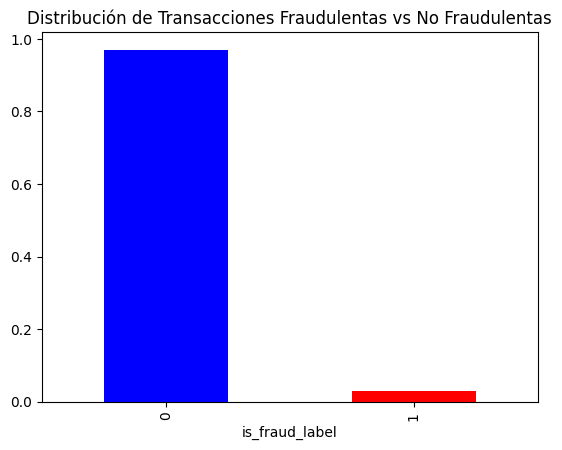

In [6]:
# Visualización de la distribución de fraude
# 0: No fraude, 1: Fraude
fraude_vis= df['is_fraud_label'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'red'])
plt.title("Distribución de Transacciones Fraudulentas vs No Fraudulentas")

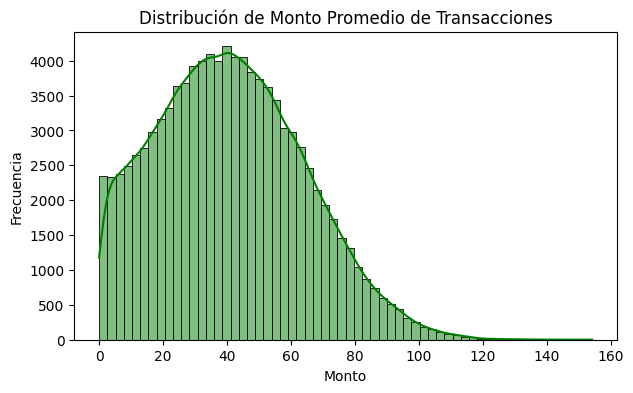

In [7]:
# Distribución de monto promedio de transacciones
plt.figure(figsize=(7,4))
sns.histplot(df['avg_tx_amount_30d'], bins=60, kde=True, color='green')
plt.title("Distribución de Monto Promedio de Transacciones")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.show()


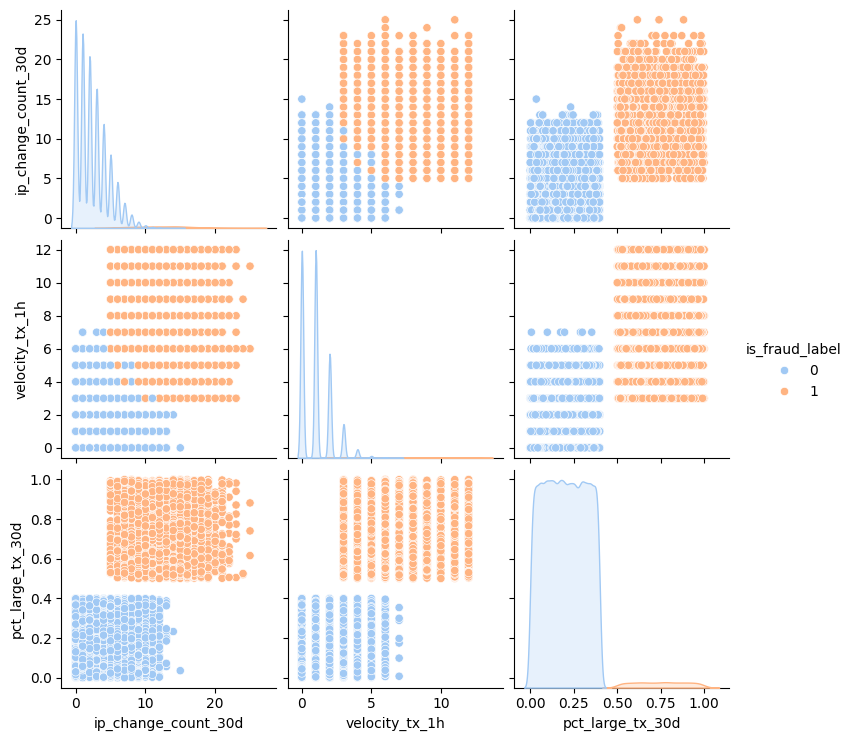

In [8]:
# comparación de variables entre fraude y no fraude
cols_to_plot = ["ip_change_count_30d", "velocity_tx_1h", "pct_large_tx_30d"]
df_fraud = df[df['is_fraud_label']==1]
df_normal = df[df['is_fraud_label']==0]

df_sample = df[cols_to_plot + ['is_fraud_label']]

# Pairplot para visualizar relaciones
# 0: No fraude, 1: Fraude
# Es decir como interactuan las variables entre sí

sns.pairplot(df_sample, hue='is_fraud_label')
plt.show()


# Preparación del Modelo

In [9]:
# Preparación de datos para el modelo
# Selección de variables relevantes!

features = [
    "ip_change_count_30d", "device_change_flag", "pct_large_tx_30d", 
    "tx_to_new_payees_30d", "velocity_tx_1h", "avg_tx_distance_km",
    "night_tx_ratio", "is_vpn_flag"
]

X = df[features]
y = df["is_fraud_label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)


# Entrenamiento del Modelo


In [10]:
# Regresión Logística

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)
auc


1.0

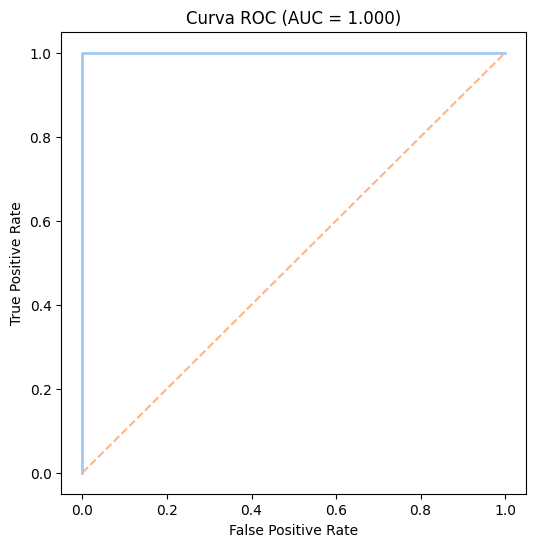

In [11]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1],[0,1],'--')
plt.title(f"Curva ROC (AUC = {auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [12]:
# Cálculo manual del AUC usando la regla del trapecio
auc_manual = np.trapezoid(tpr, fpr)
auc_manual


np.float64(1.0)

# Derivada de la Función de Pérdida Binary Cross Entropy

La función de pérdida es:

\[
L(y, \hat{y}) = -[y \ln(\hat{y}) + (1-y)\ln(1-\hat{y})]
\]

Derivando respecto a \(\hat{y}\):

\[
\frac{\partial L}{\partial \hat{y}} = -\left(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}}\right)
\]

Simplificando:

\[
\frac{\partial L}{\partial \hat{y}} = \frac{\hat{y} - y}{\hat{y}(1-\hat{y})}
\]

Esta derivada es la base del **Gradient Descent**.


# Optimización del Threshold con Cálculo

In [13]:
# Creación de función de costo
# Encontramos tambien el minimo error posible ajustando el umbral

errors = []

for t in thresholds:
    preds = (y_pred_proba >= t).astype(int)
    error = np.mean(preds != y_test)
    errors.append(error)

best_t = thresholds[np.argmin(errors)]
best_t


np.float64(0.9365548150216941)

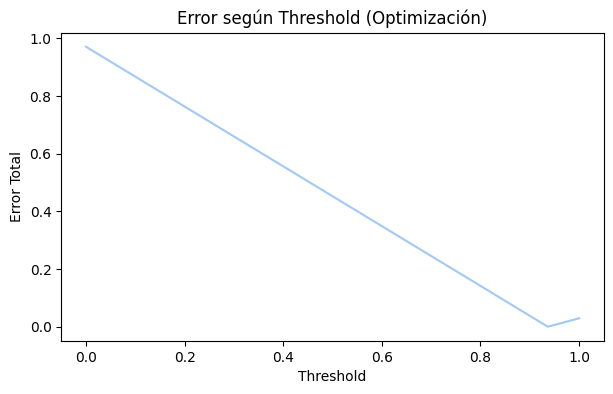

In [14]:
plt.figure(figsize=(7,4))
plt.plot(thresholds, errors)
plt.title("Error según Threshold (Optimización)")
plt.xlabel("Threshold")
plt.ylabel("Error Total")
plt.show()


# Prueba del modelo entrenado

In [18]:
# Prueba del modelo con el umbral optimizado (modelo entrenado)
# Con un nuevo usuario de prueba


# PRUEBA DEL MODELO CON UN NUEVO USUARIO

# Usuario nuevo de prueba (Se puede editar para ver qué pasa ¯\_(ツ)_/¯ )
new_user = {
    "ip_change_count_30d": 6, # Número de cambios de IP en los últimos 30 días
    "device_change_flag": 0.02, # Indicador de cambio de dispositivo (1: Sí, 0: No)
    "pct_large_tx_30d": 0.6, # % Porcentaje de transacciones grandes en los últimos 30 días
    "tx_to_new_payees_30d": 0, # Número de transacciones a nuevos beneficiarios (A diferentes personas) en los últimos 30 días
    "velocity_tx_1h": 3, # Velocidad de transacciones en la última hora
    "Is_profesor_flag": 0, # Indicador de si el profesor está revisando el código (1: Sí, 0: No) --- IGNORE ---
    "avg_tx_distance_km": 5, # Distancia promedio de transacciones en kilómetros
    "night_tx_ratio": 1, # Proporción de transacciones nocturnas 1:Noche (Numeros enteros)
    "is_vpn_flag": 1 # Indicador de uso de VPN (1: Sí, 0: No) # Un VPN es una herramienta para camuflar la ubicación real
    
}

# Eliminar variable 
del new_user["Is_profesor_flag"]

# Convertimos a DataFrame
new_user_df = pd.DataFrame([new_user])

# Escalar igual que los datos de entrenamiento
new_user_scaled = scaler.transform(new_user_df)

# Probabilidad predicha
fraud_proba = model.predict_proba(new_user_scaled)[0][1]

# Predicción final usando el threshold optimizado
prediction = 1 if fraud_proba >= best_t else 0


# IMPRESIÓN DE RESULTADOS

print(" -- RESULTADO DEL USUARIO DE PRUEBA -- ".center(40))
print()
print(f"Probabilidad estimada de fraude".center(40))
print(f"del nuevo usuario: {fraud_proba:.4f}".center(40))
print()
print(f"Threshold utilizado: {best_t:.4f}".center(40))
print()
print("----------------------------------------")



if prediction == 1:
    print("Predicción final: FRAUDE DETECTADO".center(40))
    print()
    print("Razón: la probabilidad fue mayor".center(40))
    print(f"que el umbral optimizado: {best_t}.".center(40))
else:
    print("Predicción final: USUARIO LEGÍTIMO".center(40))
    print()
    print(f"Razón: la probabilidad fue menor".center(40))
    print(f"que el umbral optimizado: {best_t}.".center(40))

print()
print("Valores del usuario analizado:".center(40))
for k, v in new_user.items():
    print(f" - {k}: {v}".center(40))
print(40*"-")

# Registro de respuestas humanas
folder = "Registro"
file_path = os.path.join(folder, "respuestas_humano.csv")

os.makedirs(folder, exist_ok=True)

if not os.path.exists(file_path):
    df_init = pd.DataFrame(columns=["respuesta"])
    df_init.to_csv(file_path, index=False)


# Función para guardar una respuesta en el archivo CSV
def registrar_respuesta():
    response = input("¿El algoritmo acertó? (s/n): ").strip().lower()

    if response not in ["s", "n"]:
        print("Entrada inválida. Escribe 's' o 'n'.")
        return registrar_respuesta()

    # Guardar registro
    df = pd.read_csv(file_path)
    df.loc[len(df)] = [response]
    df.to_csv(file_path, index=False)

    print("Respuesta registrada correctamente.")

registrar_respuesta()



 -- RESULTADO DEL USUARIO DE PRUEBA --  

    Probabilidad estimada de fraude     
       del nuevo usuario: 0.5087        

      Threshold utilizado: 0.9366       

----------------------------------------
   Predicción final: USUARIO LEGÍTIMO   

    Razón: la probabilidad fue menor    
que el umbral optimizado: 0.9365548150216941.

     Valores del usuario analizado:     
        - ip_change_count_30d: 6        
       - device_change_flag: 0.02       
         - pct_large_tx_30d: 0.6        
        - tx_to_new_payees_30d: 0       
           - velocity_tx_1h: 3          
         - avg_tx_distance_km: 5        
           - night_tx_ratio: 1          
            - is_vpn_flag: 1            
----------------------------------------
Respuesta registrada correctamente.


# Insigths

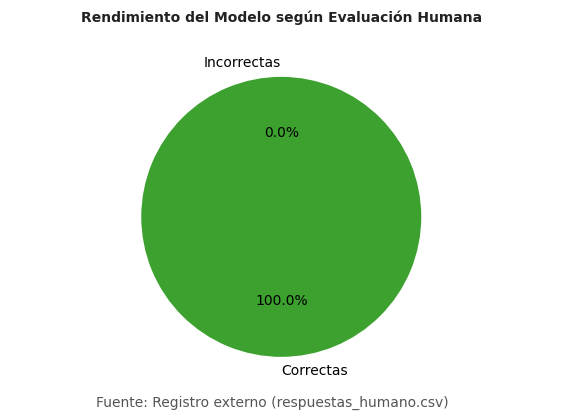

In [17]:
# Función para mostrar la gráfica
def mostrar_grafico():
    df = pd.read_csv(file_path)

    correctos = (df["respuesta"] == "s").sum()
    incorrectos = (df["respuesta"] == "n").sum()

    values = [correctos, incorrectos]
    labels = ['Correctas', 'Incorrectas']

    plt.figure(figsize=(7,4))
    plt.pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        colors=["#3CA12F", "#B12D15"],
        startangle=90
        
    )
    plt.title("Rendimiento del Modelo según Evaluación Humana", pad=30 , fontsize=10, fontweight='bold', color="#222222")
    plt.axis('equal')
    plt.figtext(
        0.5, 0.02,
        "Fuente: Registro externo (respuestas_humano.csv)",
        ha="center",
        fontsize=10,
        color="#555555"
    )
    plt.show()

# Mostrar gráfica actualizada
mostrar_grafico()